# Mosaic (“马赛克”)

Mosaic 是一种类似扫雷的变体逻辑谜题.

- 你需要涂黑一些方格；
- 数字表示包括它所在方格在内及周围一共九个方格内涂黑的方格数. 

> 注意这个和数独不大相同，因为可能存在数字为0的情况（九宫格没有涂黑的元素）。

-------

> Rules

- You have to place black cells on the grid. 

- The numbers show how many black cells are there in the neighbouring cells (horizontally, vertically and diagonally) including the number cell itself. 

<https://www.puzzle-minesweeper.com/mosaic-5x5-easy/>

In [2]:
def readGrid(path):
    with open(f"../assets/data/Mosaic/{path}.txt") as f:
        num = f.readline()
        m, n = num.split(" ")[0], num.split(" ")[1]
        grid = f.readlines()
        res = [g.strip().split(" ") for g in grid]
        return int(m), int(n), res

if __name__ == "__main__":
    m, n, grid = readGrid("60x100")
    print(m, n)
    print(len(grid), len(grid[0]))
    

60 100
60 100


In [23]:
from __future__ import print_function
from ortools.sat.python import cp_model as cp
def GetNinePossibleNeighbours(X, Y, pos):
    
    neighbours = []
    directions = [-1, 0, 1]
    
    for xdir in directions:
        for ydir in directions:
            if (pos[0] + xdir >= X or pos[0] + xdir < 0) or (pos[1] + ydir >= Y or pos[1] + ydir < 0):
                continue
            neighbours.append((pos[0] + xdir, pos[1] + ydir))
    
    return neighbours

def MosaicSolver(X, Y, grid):
    
    model = cp.CpModel()
    x = {}
    for i in range(X):
        for j in range(Y):
            x[i, j] = model.NewBoolVar(name = f"x[{i}, {j}]")
    
    for i in range(X):
        for j in range(Y):
            num = grid[i][j]
            if num in "0123456789":

                neighbours = GetNinePossibleNeighbours(X, Y, (i, j))
                cage = [x[i[0], i[1]] for i in neighbours]
                model.Add(sum(cage) == int(num))
        
    solver = cp.CpSolver()
    status = solver.Solve(model)
    result = dict()
    if status == cp.OPTIMAL:
        for i in range(X):
            for j in range(Y):
                if solver.Value(x[i, j]) > 1e-5:
                    result[i, j] = 1
                else:
                    result[i, j] = 0
                print(solver.Value(x[i, j]), end=" ")
            print()
        print()
        
        print("NumConflicts:", solver.NumConflicts())
        print("NumBranches:", solver.NumBranches())
        print("WallTime:", solver.WallTime())
    
    else:
        print("Can't find Optimal.")
    return result

if __name__ == "__main__":
    m, n, grid = readGrid("60x100")
    print(m, n)
    print(len(grid), len(grid[0]))
    result = MosaicSolver(m,n, grid)


60 100
60 100
0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 
0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 
0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 

In [24]:
print(result)

{(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0, (0, 6): 0, (0, 7): 0, (0, 8): 0, (0, 9): 0, (0, 10): 0, (0, 11): 1, (0, 12): 1, (0, 13): 1, (0, 14): 0, (0, 15): 0, (0, 16): 0, (0, 17): 0, (0, 18): 0, (0, 19): 0, (0, 20): 1, (0, 21): 1, (0, 22): 1, (0, 23): 0, (0, 24): 0, (0, 25): 0, (0, 26): 0, (0, 27): 0, (0, 28): 0, (0, 29): 0, (0, 30): 0, (0, 31): 1, (0, 32): 1, (0, 33): 1, (0, 34): 0, (0, 35): 0, (0, 36): 0, (0, 37): 0, (0, 38): 0, (0, 39): 0, (0, 40): 0, (0, 41): 1, (0, 42): 1, (0, 43): 1, (0, 44): 1, (0, 45): 1, (0, 46): 1, (0, 47): 1, (0, 48): 1, (0, 49): 1, (0, 50): 1, (0, 51): 1, (0, 52): 1, (0, 53): 1, (0, 54): 1, (0, 55): 1, (0, 56): 1, (0, 57): 0, (0, 58): 0, (0, 59): 0, (0, 60): 1, (0, 61): 1, (0, 62): 0, (0, 63): 0, (0, 64): 0, (0, 65): 0, (0, 66): 0, (0, 67): 0, (0, 68): 0, (0, 69): 0, (0, 70): 0, (0, 71): 0, (0, 72): 0, (0, 73): 0, (0, 74): 0, (0, 75): 0, (0, 76): 0, (0, 77): 0, (0, 78): 0, (0, 79): 0, (0, 80): 1, (0, 81): 0, (0, 82): 0, (0, 83): 0, (

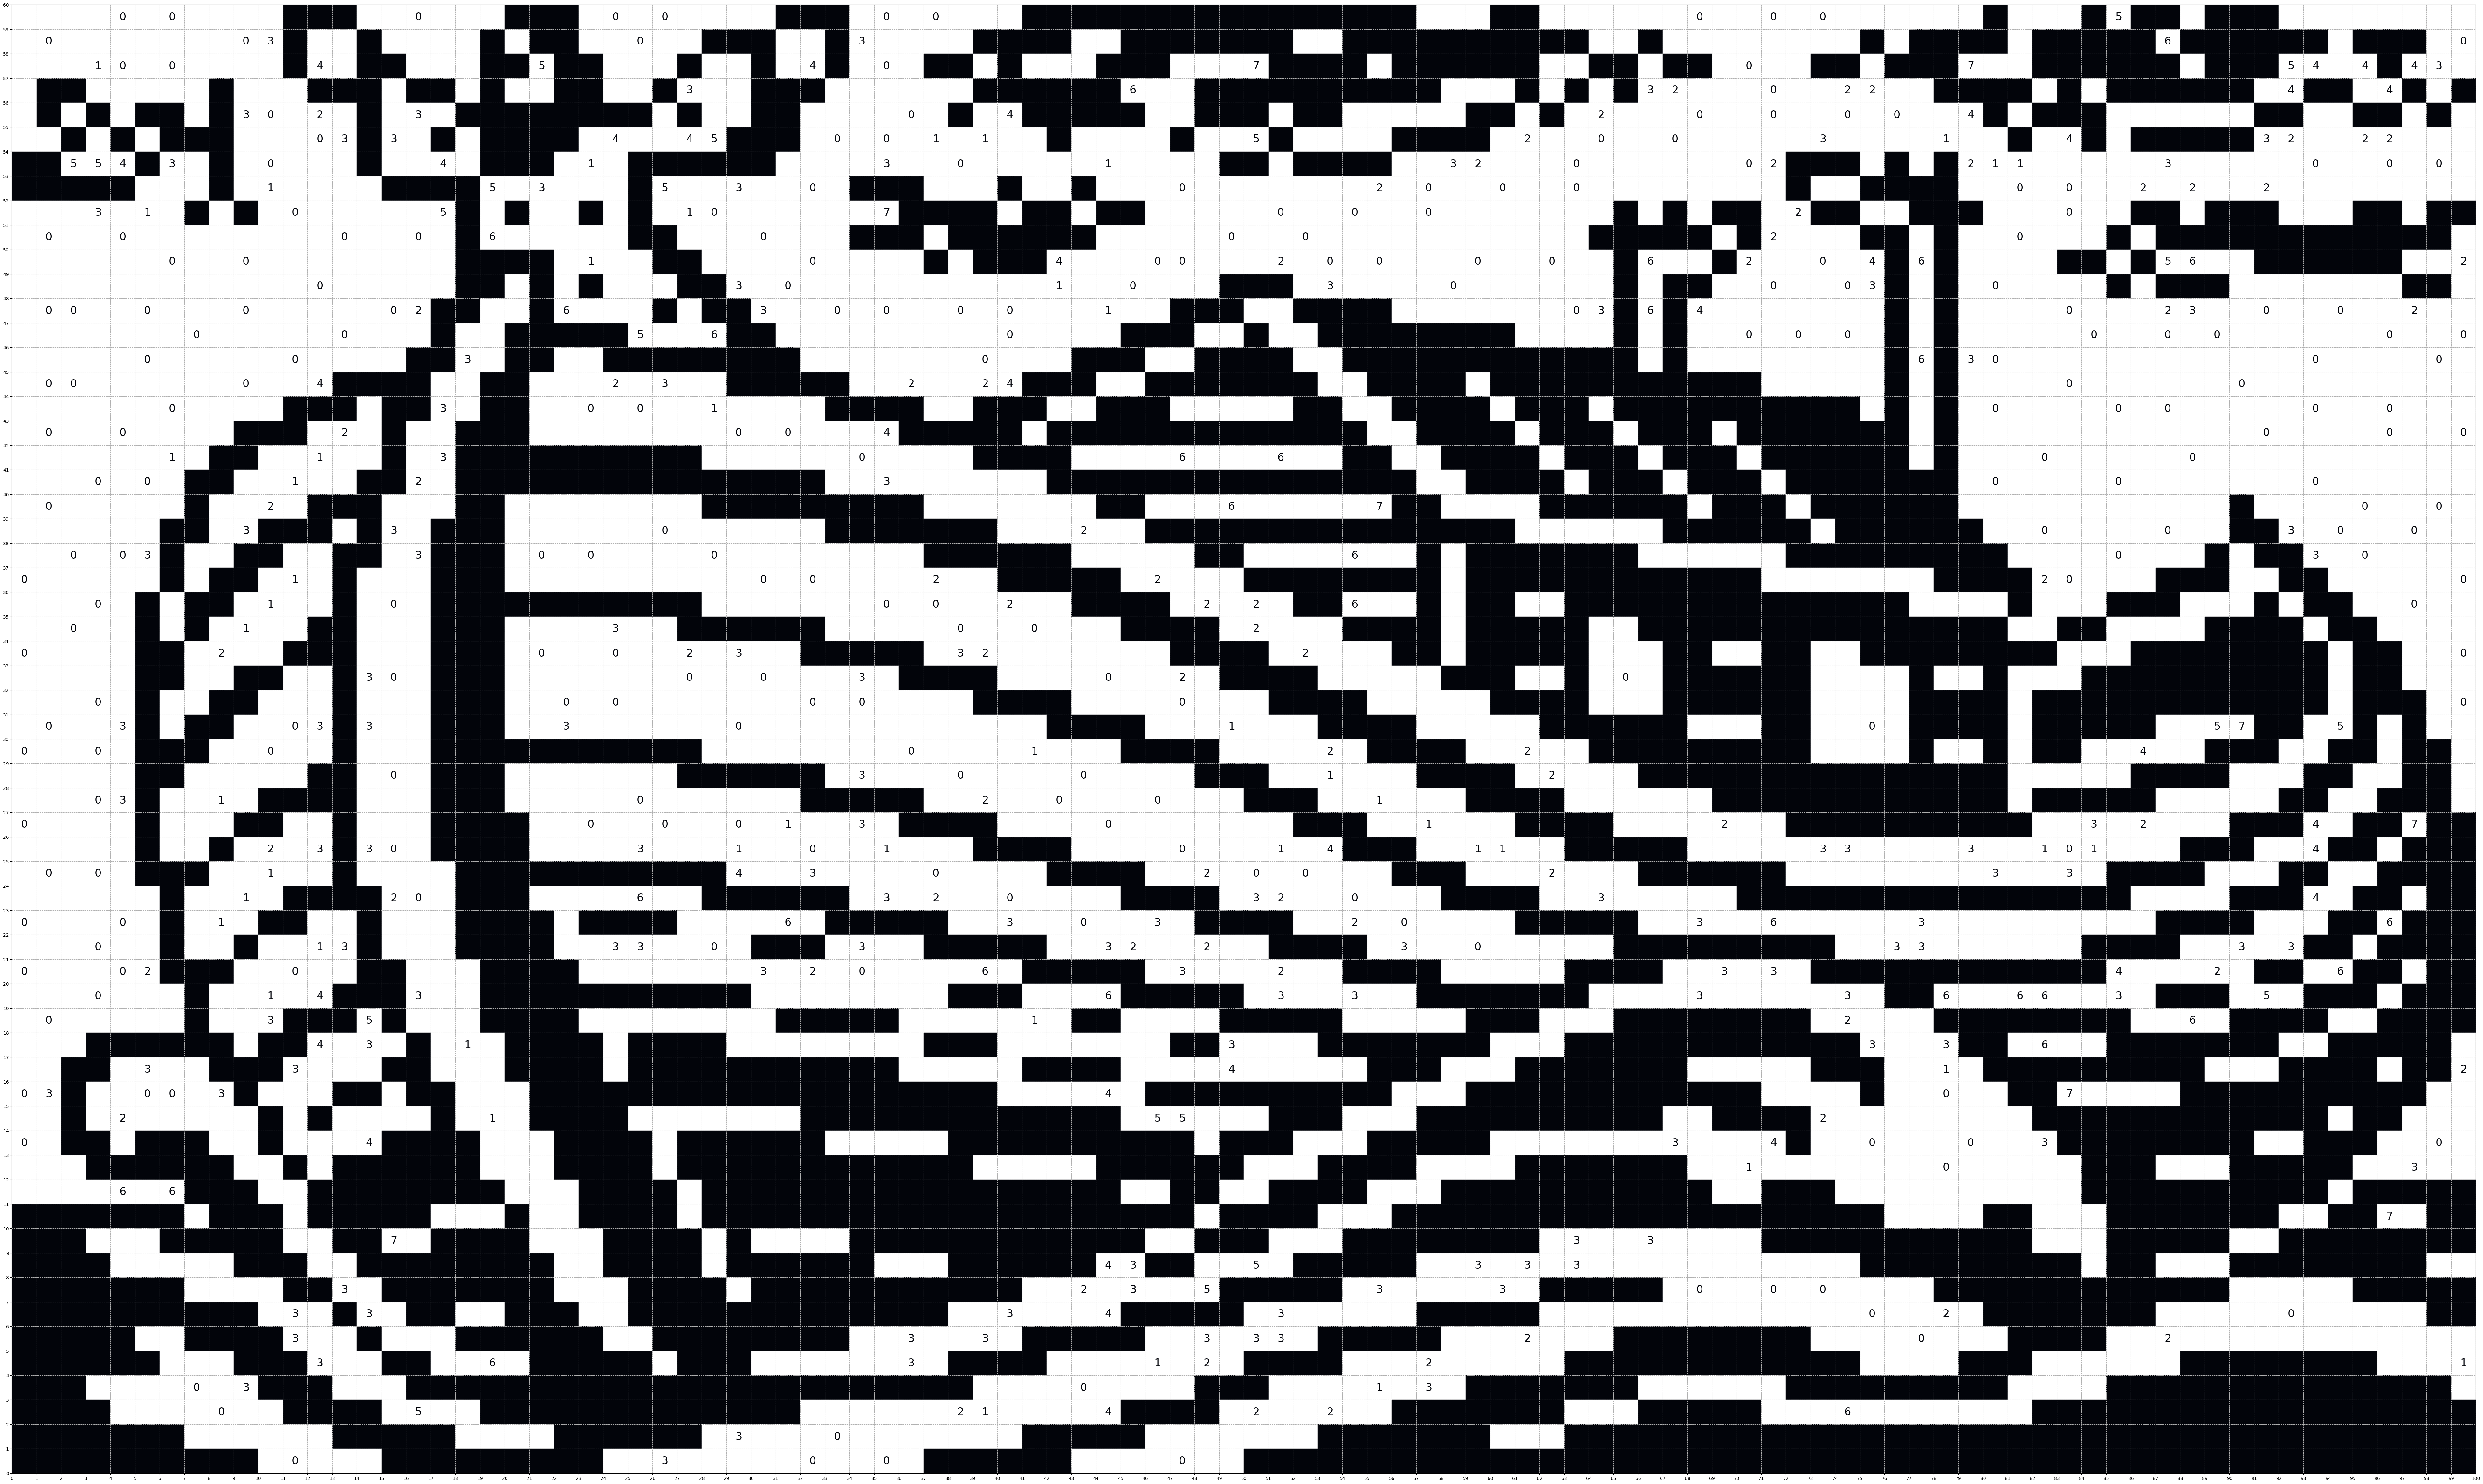

In [26]:
# ===== vsualzie ===== 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from matplotlib.pyplot import MultipleLocator

def visual(X, Y, grid, result):
    plt.figure(figsize = (Y, X))
    ax = plt.gca()
    x_major_locator = MultipleLocator(1)
    y_major_locator = MultipleLocator(1)
    ax.xaxis.set_major_locator(x_major_locator)
    ax.yaxis.set_major_locator(y_major_locator)
    plt.xlim(0,Y)
    plt.ylim(0,X)
    plt.grid(linestyle = "--")
    for i in range(X):
        for j in range(Y):
            if result[i, j] == 1:
                ax.add_patch(Rectangle((j, X - i - 1), 1, 1, color = "#02040A"))
            else:
                ax.add_patch(Rectangle((j, X - i - 1), 1, 1, color = "#ffffff"))
    for i in range(X):
        for j in range(Y):
            if grid[i][j] in "0123456789":
                ax.text(j + 0.5, X - i - 0.5 , grid[i][j], 
                        horizontalalignment = "center", 
                        verticalalignment = 'center',
                        fontsize = 24, color = "#02040A")
    plt.show()

# def coordinatesParserNodes(m, n, idx):
#     ori_x, ori_y = idx // (n + 1), idx % (n + 1)
#     return (ori_y, m - ori_x )

if __name__ == "__main__":
    visual(m, n, grid, result)

![](../assets/figures/Mosaic.png)

![](../assets/figures/Mosaic2.png)